**Import necessary libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


**Load the Dataset**

In [2]:
try:
    df = pd.read_csv('archive.zip!/Mall_Customers.csv')
except FileNotFoundError:
    print("Please make sure 'archive.zip!/Mall_Customers.csv' is uploaded to your Colab environment.")
    # As a fallback for demonstration, create a dummy dataframe
    data = {'CustomerID': range(1, 201),
            'Gender': ['Male', 'Female'] * 100,
            'Age': np.random.randint(18, 70, 200),
            'Annual Income (k$)': np.random.randint(15, 137, 200),
            'Spending Score (1-100)': np.random.randint(1, 99, 200)}
    df = pd.DataFrame(data)

Please make sure 'archive.zip!/Mall_Customers.csv' is uploaded to your Colab environment.


**Exploratory Data Analysis**

In [3]:
print("First 5 rows of the dataset:")
print(df.head())
print("\nDataset Information:")
df.info()
print("\nChecking for missing values:")
print(df.isnull().sum())

# We will focus on Annual Income and Spending Score for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

First 5 rows of the dataset:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   37                  52                      65
1           2  Female   54                  21                      10
2           3    Male   29                  90                       5
3           4  Female   61                  59                      49
4           5    Male   28                  36                      17

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB

Chec

**Feature Scaling**

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**Determine the Optimal Number of Clusters**

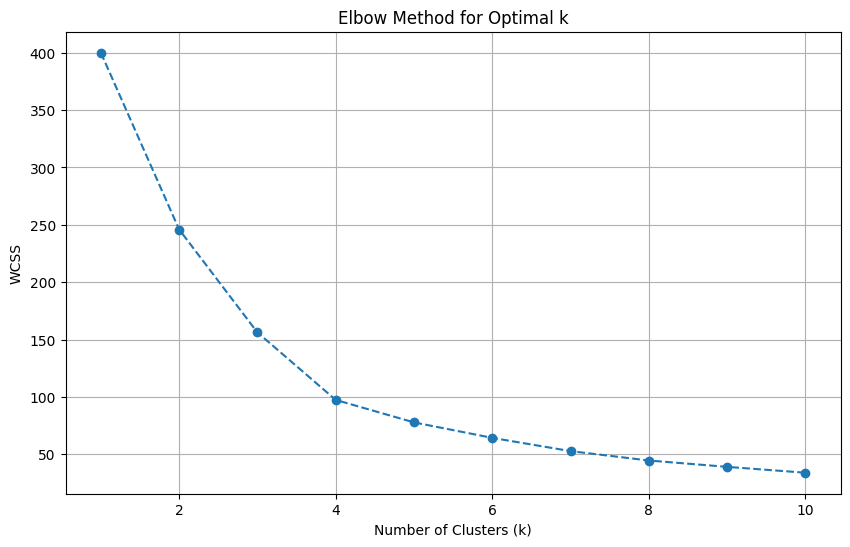

In [5]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_) # inertia_ gives the wcss value

# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

**Apply K-Means Clustering**

In [6]:
# Now we apply K-Means with the optimal number of clusters (k=5)
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)
# Fit the model and predict the clusters
y_kmeans = kmeans.fit_predict(X_scaled)

# Add the cluster information back to the original dataframe
df['Cluster'] = y_kmeans

**Visualize the Clusters**

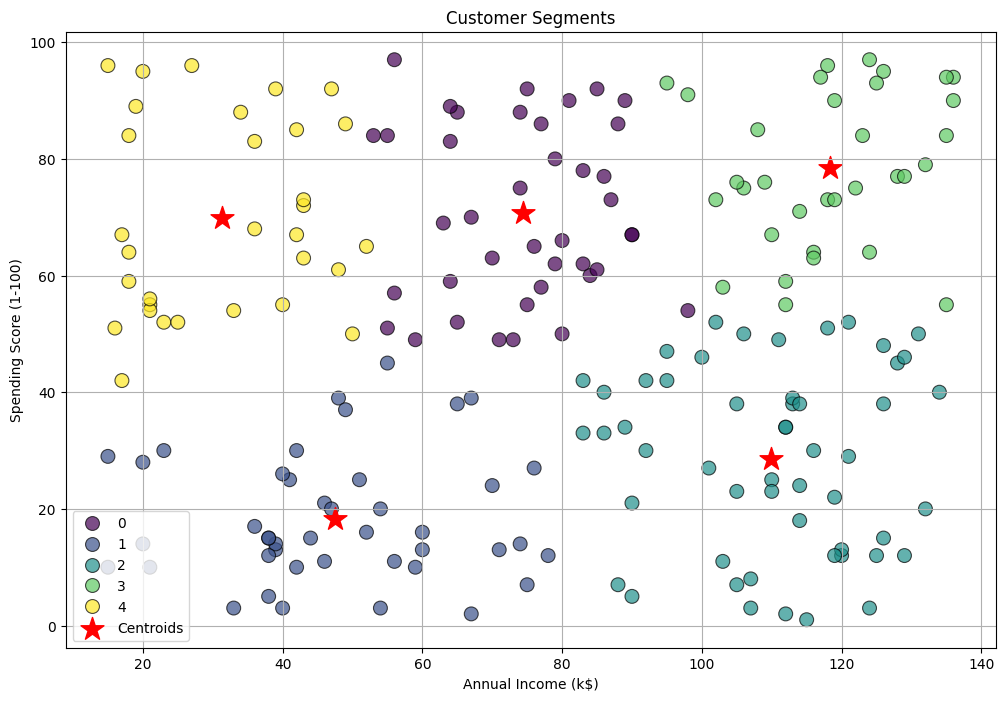

In [10]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster',
                data=df, palette='viridis', s=100, alpha=0.7, edgecolor='k')

# Plot the centroids
centers = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], s=300, c='red', marker='*', label='Centroids')

plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()

**Analyze the Clusters**

In [11]:
print("\nCluster Analysis:")
print(df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)', 'Age']].mean())


Cluster Analysis:
         Annual Income (k$)  Spending Score (1-100)        Age
Cluster                                                       
0                 74.375000               70.675000  44.425000
1                 47.488372               18.302326  43.325581
2                109.886792               28.603774  45.924528
3                118.393939               78.484848  40.818182
4                 31.387097               69.870968  46.645161
